## Logistic Regression

In this assignment I will try to build a Logistic Regression model to find out whether car belong high mileage or low mileage category depending on its characterstics like number of cylinders, engine displacement, horsepower of the car etc. I have taken the [Auto MPG Data Set](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) from the UCI Machine Leaning Repository. Our response variable is continuous in nature, so I need to do some data management step before I can build a logistic regression model on the dataset.

## Hypothesis

<ol>
<li>With increasing number of cylinders in a car the mileage decreases</li>
<li>With increasing number of engine displacement in a car the mileage of the car increases</li>
</ol>

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt

## Loading the data

In [2]:
data = pd.read_csv("auto-mpg.data", 
                   delim_whitespace=True, 
                   header=None,
                   dtype={'model year':'category', 'origin':'category', 'car name':'category'},
                   names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year',
                          'origin', 'car name'])

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Data Management

My response variable **mpg** is continuous in nature, so to perform logistic regression I will transform this variable into a categorical variable. Following I summarized and plotted the distribution of the variable **mpg**. The mean of mpg is 23.5 (approx). Hence I will categorize the cars with mpg > 24 as high mileage cars (coded as 1) otherwise a low mileage car (coded as 0)

In [4]:
data['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

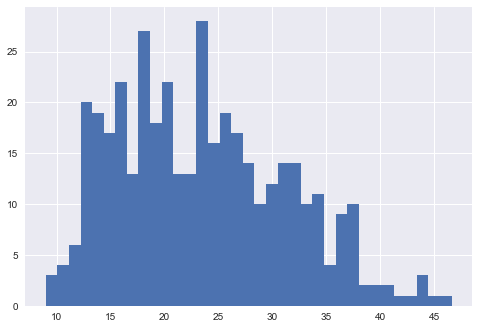

In [5]:
plt.hist(x=data['mpg'], bins=35)
plt.show()

In [6]:
data['mpg'] = data['mpg'].apply(lambda x: 1 if x > 24 else 0)
data['mpg'].value_counts()

0    225
1    173
Name: mpg, dtype: int64

Similarly I will recode explanatory variable **cylinders** (number of cylinders) as 1 (high number of cylinders) if the car has more than 5 cylinders otherwise 0 (i.e. the car has less than 5 number of cylinders)

In [7]:
data['cylinders'] = data['cylinders'].apply(lambda x: 1 if x > 5 else 0)
data['cylinders'].value_counts()

0    211
1    187
Name: cylinders, dtype: int64

## Logistic Regression

In this model my response variable is **mpg** and explanatory variables are <br>
<ol>
<li>cylinders</li>
<li>displacement etc</li>
</ol><br>
I will build the model by putting one explanatory variable at a time, so that I get to know about confounding effect if there is any.

In [8]:
# logistic regression with number of cylinders
lreg1 = smf.logit(formula = 'mpg ~ cylinders', data = data).fit()
print (lreg1.summary())
# odds ratios
print ("Odds Ratios")
print (np.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.371839
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    mpg   No. Observations:                  398
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Sep 2017   Pseudo R-squ.:                  0.4568
Time:                        00:21:06   Log-Likelihood:                -147.99
converged:                       True   LL-Null:                       -272.47
                                        LLR p-value:                 4.403e-56
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2497      0.165      7.553      0.000       0.925       1.574
cylinders     -4.2343      0.

**Answer to Q1:**The above result shows that the logistic regression model is significant (wiht p-value=0.000). And there is a negative relationship between the high number of cylinders and mileage of a car. The odds ratio suggest that cars with high number of cylinders (more than 5 cylinders) tend to have 0.014490 times more mileage than cars with low number of cylinders.

**Answer to Q2:** The above result support my hypothesis #1 that with high number of cylinders the mileage of the car decreases. It is evident from the negative parameter coefficient (-4.2343) for the explanatory variable **cylinders**

Now, lets add one more variable **displacement** to our existing model and observe the results

In [9]:
# logistic regression with number of cylinders and engine displacement
lreg2 = smf.logit(formula = 'mpg ~ cylinders + displacement', data = data).fit()
print (lreg2.summary())
# odds ratios
print ("Odds Ratios")
print (np.exp(lreg2.params))

Optimization terminated successfully.
         Current function value: 0.333143
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    mpg   No. Observations:                  398
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            2
Date:                Thu, 28 Sep 2017   Pseudo R-squ.:                  0.5134
Time:                        00:21:06   Log-Likelihood:                -132.59
converged:                       True   LL-Null:                       -272.47
                                        LLR p-value:                 1.791e-61
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2933      0.675      6.359      0.000       2.970       5.617
cylinders       -0.9218

**Answer to Q3:** when we add the new variable **displacement** we see that the variable **cylinders** becomes insignificant. In earlier model cylinders had a p-value of 0.000 and now in the new model, cylinders had a p-value of 0.144 (which is more than 0.05 and makes it an insignifact variable). We can conclude that the variable **displacement** had a confounding effect on the variable **cylinders** and **mpg** and displacement becomes the new significant variable with (OR= 0.973455, 95% CI=-0.038 -0.016, p=.000).